# MODELO DEL PLAN DE EXPANSIÓN SMA

### Análisis de Cobertura

Se realiza análisis con el número de radio bases instaladas en las diferentes parroquias

In [3]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn import preprocessing 
from yellowbrick.cluster import KElbowVisualizer
from collections import Counter
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

df_total = pd.read_excel('radiobases.xlsx')

# Preprocesamiento. Eliminar los NAN
df_total = df_total.dropna(subset=['CONECEL', 'OTECEL', 'CNT'])

### Metodología
Para el plan de expansión del SMA se divide inicialmente en dos grupos, parroquias con el servicio y parroquias sin el servicio del SMA. Se considera tomar en cuenta en el plan de expansión las parroquias que poseen el servicio, ya que existen establecimientos de áreas de interés nacional dentro de esas parroquias que aún no poseen servicio o no tienen una cobertura “Alta”.

     DPA_PROVIN   DPA_DESPRO  DPA_CANTON   DPA_DESCAN  DPA_PARROQ  \
0             1        AZUAY         101       CUENCA       10150   
1             1        AZUAY         101       CUENCA       10151   
2             1        AZUAY         101       CUENCA       10152   
3             1        AZUAY         101       CUENCA       10154   
4             1        AZUAY         101       CUENCA       10156   
..          ...          ...         ...          ...         ...   
689          24  SANTA ELENA        2401  SANTA ELENA      240156   
690          24  SANTA ELENA        2402  LA LIBERTAD      240250   
691          24  SANTA ELENA        2403      SALINAS      240350   
692          24  SANTA ELENA        2403      SALINAS      240351   
693          24  SANTA ELENA        2403      SALINAS      240352   

     DPA_PARRQ_2               DPA_DESPAR DPA_DESPARURB  \
0          10150                   CUENCA           NaN   
1          10151                    BAÑOS           N

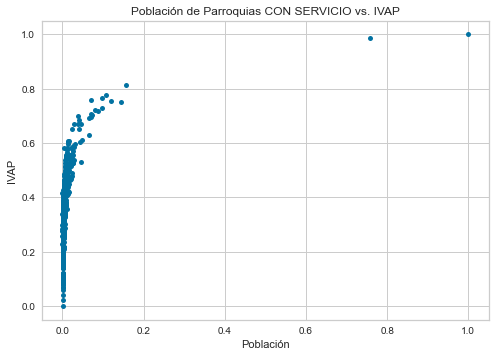

In [5]:
#%% Parroquias CON servicio
df = df_total[(df_total.PARROQUIA_CON_SERVICIO == 1)]
df = df.reset_index(drop=True)
mean_value = df['POBLACIÓN 2020'].mean()
df['POBLACIÓN 2020'].fillna(value=0, inplace=True)
print(df)

# Filtrar datos
df1 = df.filter(['IVAP_2016_2020', 'POBLACIÓN 2020'], axis=1)
print(df1)

# Normalizar datos
min_max_scaler = preprocessing.MinMaxScaler() 
df_escalado = min_max_scaler.fit_transform(df1)
df_escalado = pd.DataFrame(df_escalado) # Hay que convertir a df el resultado.
df_escalado = df_escalado.rename(columns = {0: 'IVAP_2016_2020', 1: 'POBLACIÓN 2020'})

# Representación gráfica de los datos.
x = df_escalado['POBLACIÓN 2020'].values
y = df_escalado['IVAP_2016_2020'].values
plt.xlabel('Población')
plt.ylabel('IVAP')
plt.title('Población de Parroquias CON SERVICIO vs. IVAP')
plt.plot(x,y,'o',markersize=5)
plt.savefig('Parroquias con servicio.pdf')
plt.show()


Para determinar el número de clústeres en las parroquias con servicio se usa el método Elbow para calcular la cantidad ideal de clústeres en el conjunto de datos. El método Elbow utiliza el valor de la suma de cuadrados dentro del clúster (WCSS) para definir las variaciones totales. 

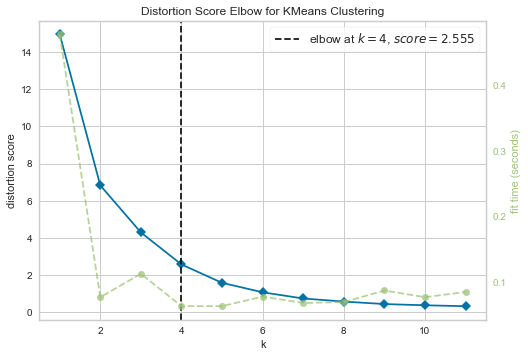

Counter({3: 322, 0: 282, 1: 88, 2: 2})
[[0.21708497 0.00131235]
 [0.5809318  0.0300709 ]
 [0.99273502 0.87887343]
 [0.38406488 0.00479418]]


In [6]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12)).fit(df_escalado)
visualizer.show()

kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(df_escalado)
print(Counter(kmeans.labels_))
labels = kmeans.predict(df_escalado)
df['label'] = labels

# Coordenadas de los centroides
centroids = kmeans.cluster_centers_
print(centroids)

Una vez normalizado los datos de las parroquias con servicio, se aplicó el algoritmo k-means. Como se puede observar las parroquias con servicio el modelo estableció 4 clústeres

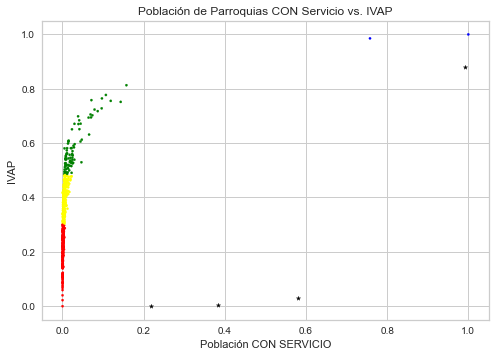

In [7]:
# Plot k-means clustering.
colores=['red','green','blue','yellow']
asignar=[]
for row in labels:
     asignar.append(colores[row])
plt.scatter(x, y, c=asignar, s=5)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='black', s=20) # Marco centroides.
plt.xlabel('Población CON SERVICIO')
plt.ylabel('IVAP')
plt.title('Población de Parroquias CON Servicio vs. IVAP')
plt.savefig('Clusters Parroquias con servicio.pdf')
plt.show()

Para determinar el número de clústeres en las parroquias con servicio y sin servicio se usa el método Elbow para calcular la cantidad ideal de clústeres en el conjunto de datos. El método Elbow utiliza el valor de la suma de cuadrados dentro del clúster (WCSS) para definir las variaciones totales. 

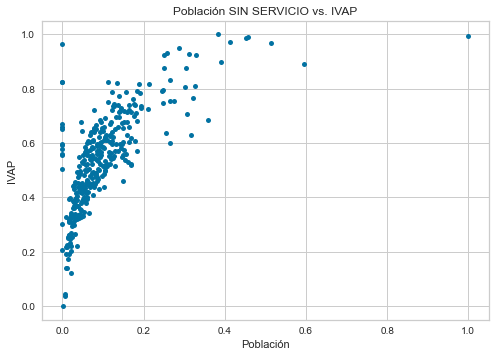

In [8]:
#%% Dataframe de parroquias SIN servicio
sin_servicio = df_total[(df_total.PARROQUIA_CON_SERVICIO == 0)]
sin_servicio = sin_servicio.reset_index(drop = True)
mean_value = sin_servicio['POBLACIÓN 2020'].mean()
sin_servicio['POBLACIÓN 2020'].fillna(value=0, inplace=True)
df2 = sin_servicio.filter(['IVAP_2016_2020', 'POBLACIÓN 2020'], axis=1)

# Normalizar datos
min_max_scaler = preprocessing.MinMaxScaler() 
df2_escalado = min_max_scaler.fit_transform(df2)
df2_escalado = pd.DataFrame(df2_escalado) # Hay que convertir a df el resultado.
df2_escalado = df2_escalado.rename(columns = {0: 'IVAP_2016_2020', 1: 'POBLACIÓN 2020'})


# Representación gráfica de los datos.
x1 = df2_escalado['POBLACIÓN 2020'].values
y1 = df2_escalado['IVAP_2016_2020'].values
plt.xlabel('Población')
plt.ylabel('IVAP')
plt.title('Población SIN SERVICIO vs. IVAP')
plt.plot(x1,y1,'o',markersize=5)
plt.savefig('Parroquias sin servicio.pdf')
plt.show()

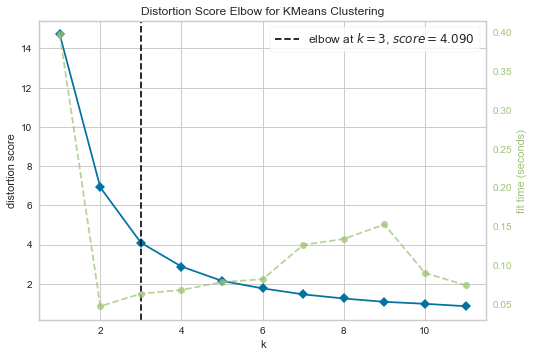

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [9]:
visualizer_sin_servicio = KElbowVisualizer(model, k=(1,12)).fit(df2_escalado)
visualizer_sin_servicio.show()

Counter({0: 166, 1: 119, 2: 63})
[[0.57314321 0.0934163 ]
 [0.34550618 0.03632698]
 [0.79979702 0.23841265]]


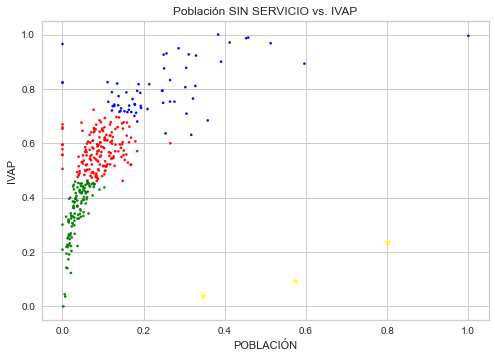

In [10]:
kmeans_sin = KMeans(n_clusters=3, init='k-means++', random_state=0).fit(df2_escalado)
print(Counter(kmeans_sin.labels_))
labels_sin = kmeans_sin.predict(df2_escalado)
sin_servicio['label'] = labels_sin

# Coordenadas de los centroides
centroids_sin = kmeans_sin.cluster_centers_
print(centroids_sin)

# Plot k-means clustering.
colores_sin=['red','green','blue']
asignar_sin=[]
for row in labels_sin:
     asignar_sin.append(colores_sin[row])
plt.scatter(x1, y1, c=asignar_sin, s=5)
plt.scatter(centroids_sin[:, 0], centroids_sin[:, 1], marker='*', c='yellow', s=40) # Marco centroides.
plt.xlabel('POBLACIÓN')
plt.ylabel('IVAP')
plt.title('Población SIN SERVICIO vs. IVAP')
plt.savefig('Clusters Parroquias sin servicio.pdf')
plt.show()

In [11]:
df['label'].replace({0:3, 1:5, 2:6, 3:4}, inplace=True)
print(Counter(df['label']))
sin_servicio['label'].replace({0:1, 1:0, 2:2}, inplace=True)
print(Counter(sin_servicio['label']))

Counter({4: 322, 3: 282, 5: 88, 6: 2})
Counter({1: 166, 0: 119, 2: 63})


Con la información entregada de los sectores de salud, educación y ECU 911 se procedió a procesarla.

In [12]:
#%% Procesamiento de información

# import base salud
df_salud = pd.read_excel('salud.xlsx')
df_salud = df_salud[(df_salud.Cobertura != 'Alta')]
df_salud = df_salud.reset_index(drop= True)

# Añadiendo una nueva columna cluster a df_salud
shape = (df_salud.shape[0], 1)
a = np.empty(shape)
a.fill(7)
df_salud['cluster'] = a

def clasificar_sector(base_df, sector_df):
    for i in range(len(base_df)):
        for j in range(len(sector_df)):
            if base_df.DPA_PARRQ_2[i] == sector_df.PAR_COD[j] and sector_df.cluster[j]==7:
                sector_df.loc[j, 'cluster'] = base_df['label'][i]

# clasificando los centros de salud
clasificar_sector(sin_servicio, df_salud)
clasificar_sector(df, df_salud)

# import base educación
df_educacion = pd.read_excel('educación.xlsx')
df_educacion = df_educacion[(df_educacion.Cobertura != 'Alta')]
df_educacion = df_educacion.reset_index(drop = True)

# Añadiendo una nueva columna cluster a df_educacion
shape_edu = (df_educacion.shape[0], 1)
b = np.empty(shape_edu)
b.fill(7)
df_educacion['cluster'] = b

# clasificando las escuelas
clasificar_sector(sin_servicio, df_educacion)
clasificar_sector(df, df_educacion)

# import base ecu911
df_ecu911 = pd.read_excel('911.xlsx')
df_ecu911 = df_ecu911[(df_ecu911.Cobertura != 'ALTA')]
df_ecu911 = df_ecu911.reset_index(drop = True)

# Añadiendo una nueva columna cluster a df_ecu911
shape_911 = (df_ecu911.shape[0], 1)
c = np.empty(shape_911)
c.fill(7)
df_ecu911['cluster'] = c

# clasificando las centros del 911
clasificar_sector(sin_servicio, df_ecu911)
clasificar_sector(df, df_ecu911)

# Añadiendo periodo de expansión para cada establecimiento
for i in range(8):
    if i == 0 or i == 3 or i == 6 or i == 7:
        df_salud.loc[df_salud['cluster'] == i, 'periodo de expansión'] = ' 1-2 años'
        df_educacion.loc[df_educacion['cluster'] == i, 'periodo de expansión'] = '1-2 años'   
        df_ecu911.loc[df_ecu911['cluster'] == i, 'periodo de expansión'] = '1-2 años'
    elif i == 1 or i == 5:
       df_salud.loc[df_salud['cluster'] == i, 'periodo de expansión'] = '3-4 años'
       df_educacion.loc[df_educacion['cluster'] == i, 'periodo de expansión'] = '3-4 años'   
       df_ecu911.loc[df_ecu911['cluster'] == i, 'periodo de expansión'] = '3-4 años'
    elif i == 2 or i == 4:
        df_salud.loc[df_salud['cluster'] == i, 'periodo de expansión'] = '5-8 años'
        df_educacion.loc[df_educacion['cluster'] == i, 'periodo de expansión'] = '5-8 años'   
        df_ecu911.loc[df_ecu911['cluster'] == i, 'periodo de expansión'] = '5-8 años'
       
dic_salud = {}
dic_educacion = {}
dic_ecu911 = {}
def agrupamiento(diccionario, sector_df):
    for i in range(8):
        try:
            diccionario[i] = len(sector_df.groupby('cluster').get_group(i))
        except:
           pass

agrupamiento(dic_salud, df_salud)
agrupamiento(dic_educacion, df_educacion)
agrupamiento(dic_ecu911, df_ecu911)
   
print('Cluster de salud', dic_salud)
print('Cluster de eduación', dic_educacion)
print('Cluster de ecu911', dic_ecu911)

Cluster de salud {0: 1, 1: 1, 2: 1, 3: 6, 4: 16, 5: 26, 7: 42}
Cluster de eduación {0: 222, 1: 657, 2: 394, 3: 1439, 4: 2124, 5: 546, 6: 15, 7: 56}
Cluster de ecu911 {4: 1, 5: 6, 7: 5}


Finalmente se procede a exportar los resultados clasificados por sector de salud, educación y ECU911.

In [13]:
#%% Exportando resultados
df.to_excel(r'df.xlsx', index=True, header=True)
sin_servicio.to_excel(r'sin_servicio.xlsx', index=True, header=True)
df_salud.to_excel(r'salud_clasificado.xlsx', index=True, header=True)
df_educacion.to_excel(r'eduación_clasificado.xlsx', index=True, header=True)
df_ecu911.to_excel(r'ecu911_clasificado.xlsx', index=True, header=True)

Con las coordenadas disponibles se procede a graficar en función de la latidud y longitud, los diferentes establecimientos de las áres priorizadas.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


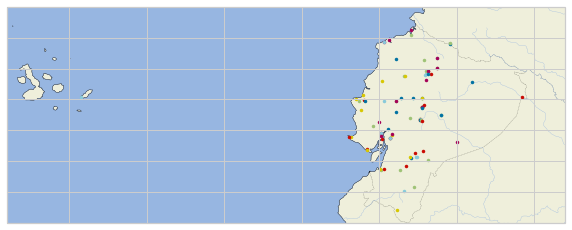

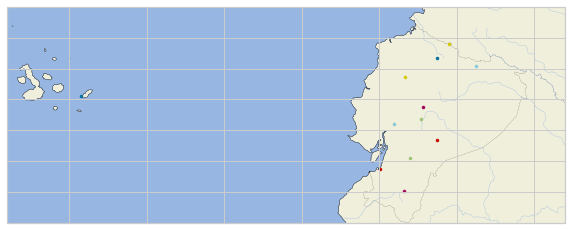

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

import warnings
warnings.filterwarnings("ignore")

def graficar(sector_df, extent):
    proj = ccrs.Mercator()
    plt.figure(figsize=(10,10))
    ax = plt.axes(projection=proj)
    
    ax.set_extent(extent, crs=ccrs.PlateCarree())
    ax.add_feature(cfeature.LAND, edgecolor='black')
    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.LAKES, alpha=0.5)
    ax.add_feature(cfeature.RIVERS)
    ax.gridlines()
    
    for i in range(len(sector_df)):
        x, y = sector_df.LONGITUD[i], sector_df.LATITUD[i]
        ax.plot(x, y, '.', transform = ccrs.Geodetic())
        #ax.text(x, y, sector_df.PARR_DESC[i], transform = ccrs.Geodetic())
    plt.legend(loc="upper left")

# coordenadas de Ecuador -1.831239, -78.183406
extent = [-92, -74, 2,-5]
df_salud1 = pd.read_excel('salud_clasificado.xlsx', index_col=0)

# Graficar los centros priorizados de salud
graficar(df_salud1, extent)

# Graficar los centros priorizados de educación
df_ecu911 = pd.read_excel('ecu911_clasificado.xlsx', index_col=0)
graficar(df_ecu911, extent)